In [1]:
import numpy as np
from data_utils import *

Using TensorFlow backend.


# Load Image

In [2]:
IMG_HEIGHT = 384
IMG_WIDTH = 256
BATCH_SIZE = 8

x_train = np.load('dataset/x_train.npy').astype(np.float32)
x_test = np.load('dataset/x_test.npy').astype(np.float32)
y_train = np.load('dataset/y_train_onehot.npy').astype(np.float32)
y_test = np.load('dataset/y_test_onehot.npy').astype(np.float32)

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(900, 384, 256, 3) (900, 384, 256, 4)
(100, 384, 256, 3) (100, 384, 256, 4)


# Load U-Net

In [3]:
from models.UNet import *

In [4]:
model = UNet(img_shape = x_train[0].shape, num_of_class = 4,learning_rate = 1e-3)

In [5]:
model.show_model()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 384, 256, 3)  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 384, 256, 64) 1792        input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 384, 256, 64) 36928       conv2d_1[0][0]                   
__________________________________________________________________________________________________
max_pooling2d_1 (MaxPooling2D)  (None, 192, 128, 64) 0           conv2d_2[0][0]                   
__________________________________________________________________________________________________
conv2d_3 (

# Train model

In [6]:
history = model.train_generator(x_train, y_train, 
                                x_test, y_test, 
                                'UNet_model',
                                epoch = 50,
                                batch_size = BATCH_SIZE)

Epoch 1/50
113/113 [==============================] - 93s 825ms/step - loss: 0.5796 - acc: 0.7998 - val_loss: 0.3829 - val_acc: 0.8618

Epoch 00001: val_acc improved from -inf to 0.86176, saving model to ./save_model/UNet_model.h5
Epoch 2/50
113/113 [==============================] - 75s 666ms/step - loss: 0.2881 - acc: 0.8931 - val_loss: 0.2525 - val_acc: 0.9127

Epoch 00002: val_acc improved from 0.86176 to 0.91268, saving model to ./save_model/UNet_model.h5
Epoch 3/50
113/113 [==============================] - 75s 668ms/step - loss: 0.2384 - acc: 0.9125 - val_loss: 0.2212 - val_acc: 0.9196

Epoch 00003: val_acc improved from 0.91268 to 0.91957, saving model to ./save_model/UNet_model.h5
Epoch 4/50
113/113 [==============================] - 76s 669ms/step - loss: 0.2067 - acc: 0.9238 - val_loss: 0.2207 - val_acc: 0.9171

Epoch 00004: val_acc did not improve from 0.91957
Epoch 5/50
113/113 [==============================] - 76s 673ms/step - loss: 0.1854 - acc: 0.9313 - val_loss: 0.179

113/113 [==============================] - 76s 674ms/step - loss: 0.0287 - acc: 0.9897 - val_loss: 0.0734 - val_acc: 0.9794

Epoch 00039: val_acc did not improve from 0.97965
Epoch 40/50
113/113 [==============================] - 76s 675ms/step - loss: 0.0281 - acc: 0.9899 - val_loss: 0.0768 - val_acc: 0.9791

Epoch 00040: val_acc did not improve from 0.97965
Epoch 41/50
113/113 [==============================] - 76s 674ms/step - loss: 0.0273 - acc: 0.9902 - val_loss: 0.0750 - val_acc: 0.9792

Epoch 00041: val_acc did not improve from 0.97965

Epoch 00041: ReduceLROnPlateau reducing learning rate to 4.0000001899898055e-05.
Epoch 42/50
113/113 [==============================] - 76s 675ms/step - loss: 0.0260 - acc: 0.9906 - val_loss: 0.0757 - val_acc: 0.9795

Epoch 00042: val_acc did not improve from 0.97965
Epoch 43/50
113/113 [==============================] - 76s 674ms/step - loss: 0.0255 - acc: 0.9908 - val_loss: 0.0771 - val_acc: 0.9795

Epoch 00043: val_acc did not improve from 0.9

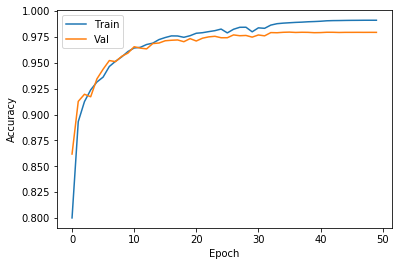

In [7]:
plot_acc(history)

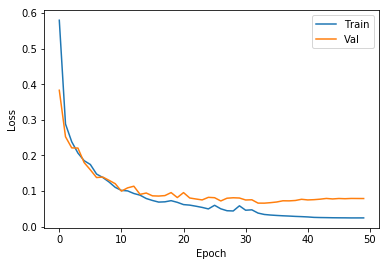

In [8]:
plot_loss(history)